The aim of this notebook is to improve the baseline linear prediction by feature selection and engineering, find possible clusters for segmential regressiona, and I also experimented with an automated feature engineering based on tripartitive mutual information. The method seemed to work in some cases but one should be careful of overfitting with those new variables.

In [1]:
#ok so there were too many variables, here we aim to reduce the number of variables as well asinvestigating whether we
#could use segmental regression

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from IPython.display import display
pd.options.display.max_columns = None

%matplotlib inline


#load variables
%store -r qual_encoded
%store -r binary_encoded
%store -r quantitative
%store -r correlations
#ok, ready for models..

train_df = pd.read_csv('train_df_processed.csv',index_col=None)
test_df = pd.read_csv('test_df_processed.csv',index_col=None)


MIs=pd.read_csv('MIs.csv',index_col=None)


X_train = train_df.drop("SalePrice", axis=1)
Y_train = train_df["SalePrice"]
X_test=test_df.drop("SalePrice", axis=1)
combi_df=pd.concat([X_train,X_test], keys=['train', 'test'])

trainlen=X_train.shape[0]

display(X_test.head())

#remove SalePrice from quantitative
quantitative.remove('SalePrice')

,MSZoning_E,Street_E,Alley_E,LotShape_E,LandContour_E,Utilities_E,LotConfig_E,LandSlope_E,Neighborhood_E,Condition1_E,Condition2_E,BldgType_E,HouseStyle_E,RoofStyle_E,RoofMatl_E,Exterior1st_E,Exterior2nd_E,MasVnrType_E,ExterQual_E,ExterCond_E,Foundation_E,BsmtQual_E,BsmtCond_E,BsmtExposure_E,BsmtFinType1_E,BsmtFinType2_E,Heating_E,HeatingQC_E,CentralAir_E,Electrical_E,KitchenQual_E,Functional_E,FireplaceQu_E,GarageType_E,GarageFinish_E,GarageQual_E,GarageCond_E,PavedDrive_E,PoolQC_E,Fence_E,MiscFeature_E,SaleType_E,SaleCondition_E,MSSubClass_E,EnclosedPorch_0,BsmtFinSF2_0,LowQualFinSF_0,WoodDeckSF_0,Fireplaces_0,3SsnPorch_0,PoolArea_0,MiscVal_0,ScreenPorch_0,OpenPorchSF_0,BsmtUnfSF_0,GarageArea_0,2ndFlrSF_0,TotalBsmtSF_0,MasVnrArea_0,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea
0,3.0,2.0,3.0,1.0,2.0,2.0,1.0,1.0,11.0,3.0,5.0,5.0,6.0,2.0,3.0,12.0,13.0,2.0,2.0,4.0,3.0,3.0,4.0,2.0,2.0,3.0,6.0,3.0,2.0,6.0,2.0,7.0,2.0,6.0,2.0,4.0,6.0,3.0,1.0,3.0,4.0,5.0,5.0,12.0,1,0,1,0,1,1,1,1,0,1,0,0,1,0,1,11622,5,6,1961,1961,0.0,468.0,882.0,896,0,896,0.0,1,0,2,1,5,1.0,730.0
1,4.0,2.0,3.0,2.0,2.0,2.0,3.0,1.0,11.0,5.0,5.0,5.0,6.0,5.0,3.0,6.0,5.0,3.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,6.0,6.0,3.0,2.0,6.0,3.0,7.0,2.0,6.0,2.0,4.0,6.0,3.0,1.0,5.0,3.0,5.0,5.0,12.0,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,14267,6,6,1958,1958,108.0,923.0,1329.0,1329,0,1329,0.0,1,1,3,1,6,1.0,312.0
2,4.0,2.0,3.0,2.0,2.0,2.0,1.0,1.0,15.0,5.0,5.0,5.0,7.0,2.0,3.0,12.0,13.0,2.0,2.0,4.0,6.0,4.0,4.0,2.0,7.0,6.0,6.0,4.0,2.0,6.0,2.0,7.0,4.0,6.0,4.0,4.0,6.0,3.0,1.0,3.0,4.0,5.0,5.0,15.0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,1,13830,5,5,1997,1998,0.0,791.0,928.0,928,701,1629,0.0,2,1,3,1,6,2.0,482.0
3,4.0,2.0,3.0,2.0,2.0,2.0,1.0,1.0,15.0,5.0,5.0,5.0,7.0,2.0,3.0,12.0,13.0,3.0,2.0,4.0,6.0,3.0,4.0,2.0,7.0,6.0,6.0,5.0,2.0,6.0,3.0,7.0,5.0,6.0,4.0,4.0,6.0,3.0,1.0,5.0,4.0,5.0,5.0,15.0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,9978,6,6,1998,1998,20.0,602.0,926.0,926,678,1604,0.0,2,1,3,1,7,2.0,470.0
4,4.0,2.0,3.0,2.0,4.0,2.0,1.0,1.0,23.0,5.0,5.0,4.0,6.0,2.0,3.0,9.0,10.0,2.0,3.0,4.0,6.0,4.0,4.0,2.0,5.0,6.0,6.0,5.0,2.0,6.0,3.0,7.0,2.0,6.0,3.0,4.0,6.0,3.0,1.0,5.0,4.0,5.0,5.0,14.0,1,1,1,1,1,1,1,1,0,0,0,0,1,0,1,5005,8,5,1992,1992,0.0,263.0,1280.0,1280,0,1280,0.0,2,0,2,1,5,2.0,506.0


In [2]:
#do a logarithmic transformation for following variables=
logtrans=['1stFlrSF','2ndFlrSF','BsmtFinSF1','GrLivArea','YearBuilt','TotalBsmtSF']

combi_df[logtrans]=np.log1p(combi_df[logtrans])
Y_train=np.log1p(Y_train.values)
print('done')

done


RF scores:  [ 0.12471374  0.15589824  0.14685711  0.12398117]  mean:  0.137862565425
Lasso scores:  [ 0.13965307  0.13461721  0.13081253  0.1102526 ]  mean:  0.128833853043
RF scores:  [ 0.13223541  0.14416351  0.14822949  0.1405147 ]  mean:  0.141285775012
Lasso scores:  [ 0.12284227  0.13057655  0.14403605  0.11906441]  mean:  0.129129823496


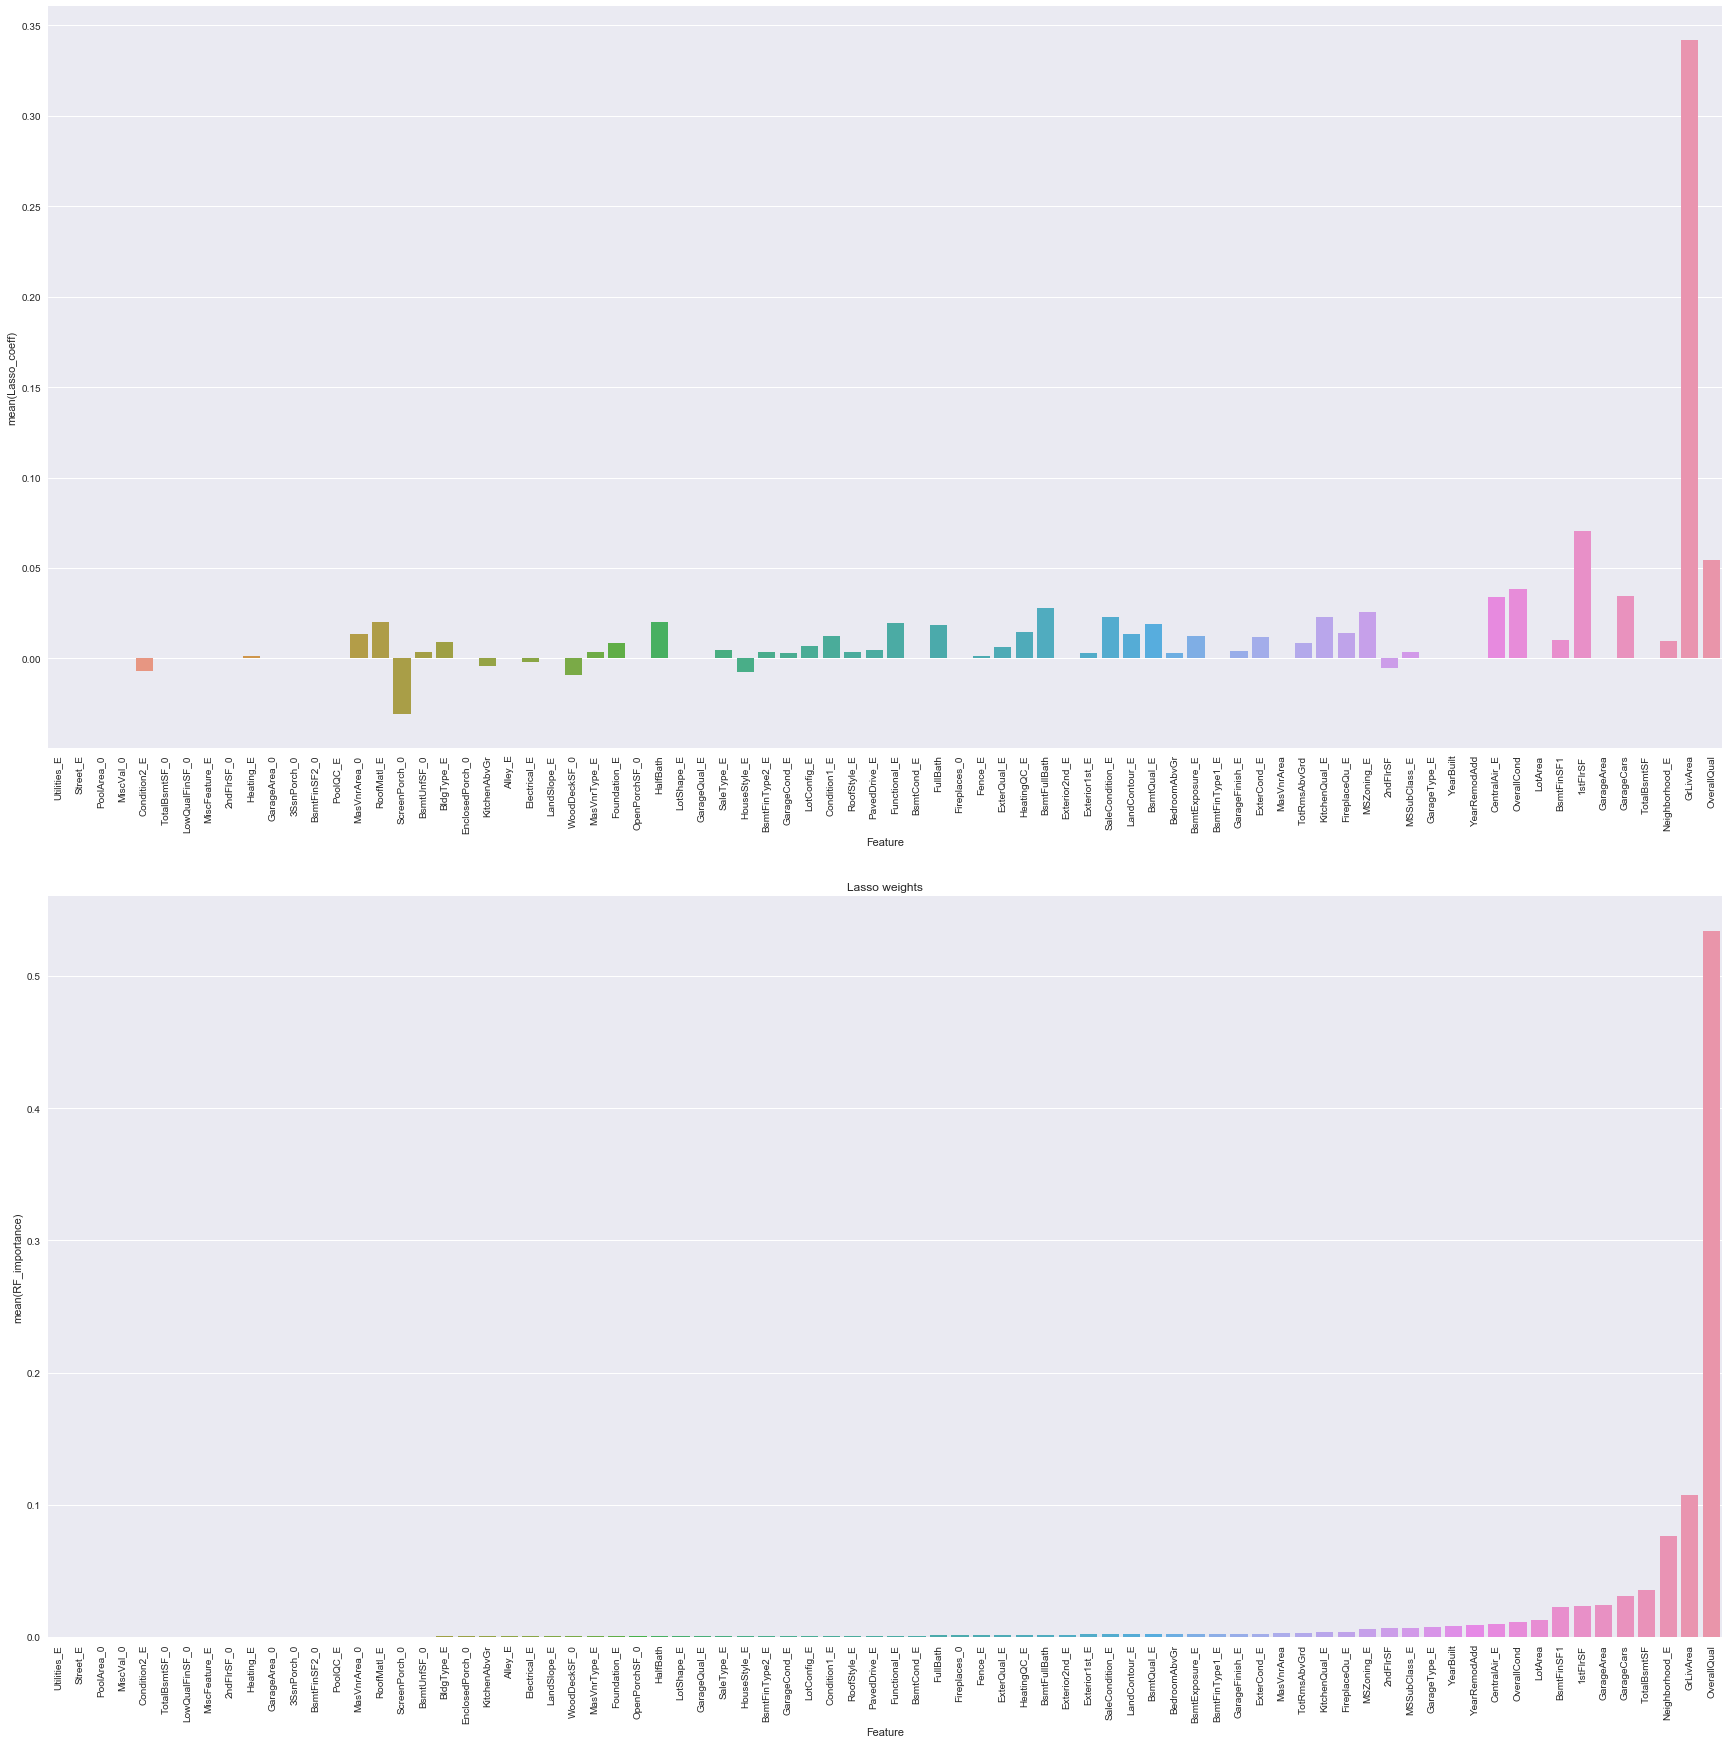

In [3]:
#random forest regress to get another estimator for the variable importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, Lasso, LassoLarsCV,LinearRegression
#return table of feature scores using Random forest and lasso feature ranking, plot it
def CheckFeatures(input_df,Y_train,variables=None):
    
    if variables:
        X_train=input_df[variables]
    else:
        X_train=input_df
    
    #check with earlier reltively good parameters
    RF=RandomForestRegressor(n_estimators=100)
    lasso=Lasso(max_iter=10000,alpha=0.001)

    for i in range(2):
        
        kfold=KFold(n_splits=4, shuffle=True, random_state=41*i)
    
        scores=np.sqrt(-cross_val_score(RF, X_train, Y_train, scoring="neg_mean_squared_error", cv = kfold))
        mean=np.mean(scores)                            
        print('RF scores: ',scores,' mean: ', mean) 

        scores=np.sqrt(-cross_val_score(lasso, X_train, Y_train, scoring="neg_mean_squared_error", cv = kfold))
        mean=np.mean(scores)                            
        print('Lasso scores: ',scores,' mean: ', mean) 

    
    #gather into a dataframe----------

    RF.fit(X_train, Y_train)  
    lasso.fit(X_train, Y_train)             
                       
    allfeat_df = pd.DataFrame(X_train.columns)
    allfeat_df.columns = ['Feature']
    allfeat_df["RF_importance"] = pd.Series(RF.feature_importances_)
    allfeat_df["Lasso_coeff"] = pd.Series(lasso.coef_)
    allfeat_df.sort_values(by='RF_importance',inplace=True)
                       
    #print

    f, (ax1,ax2) =plt.subplots(2,figsize=(30, 30)) 
    plt.title('Lasso weights')


    ax1.set_xticklabels(ax1.xaxis.get_ticklabels(),rotation=90)
    sns.barplot(data=allfeat_df, x='Feature', y='Lasso_coeff',ax=ax1)

    ax2.set_xticklabels(ax1.xaxis.get_ticklabels(),rotation=90)
    sns.barplot(data=allfeat_df, x='Feature', y='RF_importance',ax=ax2)
                       
#run
                       
variables=quantitative+qual_encoded+binary_encoded
CheckFeatures(combi_df.loc['train'],Y_train,variables)                      


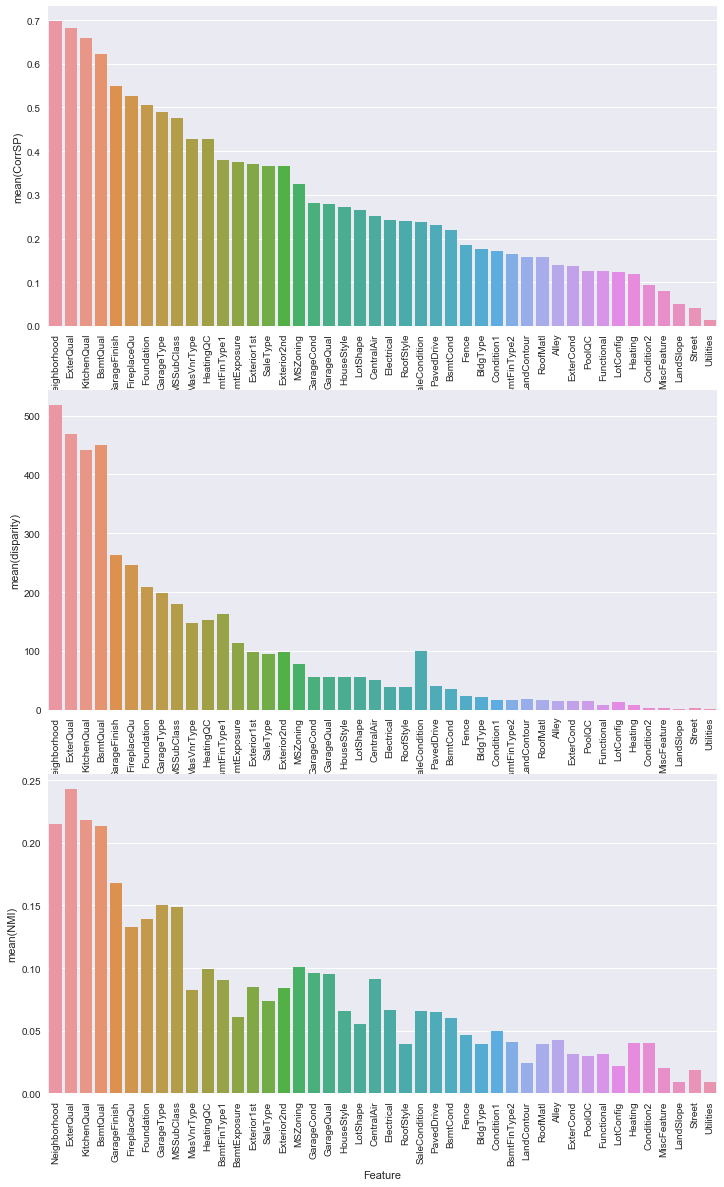

In [4]:
#now compare the anova, ordering the categories and mutual informance

correlations=correlations.merge(MIs,on='Feature')

#display(correlations)
f, (ax1,ax2,ax3)=plt.subplots(3,figsize=(12, 20)) 

ax1.set_xticklabels(ax1.xaxis.get_ticklabels(),rotation=90)
sns.barplot(data=correlations, x='Feature', y='CorrSP',ax=ax1)

ax2.set_xticklabels(ax1.xaxis.get_ticklabels(),rotation=90)
sns.barplot(data=correlations, x='Feature', y='disparity',ax=ax2)

ax3.set_xticklabels(ax1.xaxis.get_ticklabels(),rotation=90)
sns.barplot(data=correlations, x='Feature', y='NMI',ax=ax3)
        
#display(MI.unstack().sort_values(ascending=False)[0:40])

In [5]:
#so lets start by removing the bad features on all categories
remove=['Utilities_E','Street_E','LandSlope_E','MiscFeature_E']

#let us furthermore check which of the variables are most correlated with each other
variables=quantitative+qual_encoded
corrmat = combi_df[variables].corr().abs() #take the absolute values

for var in variables:
    corrmat.loc[var,var]=0 #set the diagonal to low value

display(corrmat.unstack().sort_values(ascending=False)[:15])

#remove the values which I think are represented by the dublicate already
remove.extend(['Exterior2nd_E','GarageCars','GarageCond_E'])

#remove, no need to remove from dataframe, just remove from selected list
#train_df.drop(remove,axis=1,inplace=True)
#test_df.drop(remove,axis=1,inplace=True)

for f in remove:    
    try:
        quantitative.remove(f)
        
    except Exception:
        qual_encoded.remove(f)


GarageArea     GarageCars       0.889700
GarageCars     GarageArea       0.889700
Exterior2nd_E  Exterior1st_E    0.888392
Exterior1st_E  Exterior2nd_E    0.888392
GarageCond_E   GarageQual_E     0.867224
GarageQual_E   GarageCond_E     0.867224
GrLivArea      TotRmsAbvGrd     0.804969
TotRmsAbvGrd   GrLivArea        0.804969
OverallQual    ExterQual_E      0.733355
ExterQual_E    OverallQual      0.733355
               KitchenQual_E    0.716626
KitchenQual_E  ExterQual_E      0.716626
BsmtCond_E     TotalBsmtSF      0.702364
TotalBsmtSF    BsmtCond_E       0.702364
Foundation_E   YearBuilt        0.692047
dtype: float64

In [6]:
#construct new variables using tripartitive mutual information, check how much information is gained by adding a variable
#firts bin th variblaes
#after some testing it showed up that this is highly potential type of variable for overfitting, thus the threshold
#for accepting new variables should be quite big

from sklearn.metrics import mutual_info_score
from sklearn.metrics import normalized_mutual_info_score

def Binvalues(data_df,variables,binnum):

    for var in variables:
        
        binvars=[]
        name=var+'_bin'
        binvars.append(name)
        data_df[name]=pd.cut(data_df[var],4,labels=list(range(1,binnum+1)))
        
    return data_df,binvars

#bin values
combi_df,binvars=Binvalues(combi_df,quantitative,4)
#also salebins
Y_train_binned=pd.cut(Y_train,4,labels=list(range(1,4+1)))


#calculate the mutual information and tripartitive mutual information
def TMI(data_df,variables,target):

    #allocate
    numvars=len(variables)
    tmis=np.zeros((numvars,numvars))
    mis=np.zeros((numvars))

    #mutual informations
    mi_train=pd.DataFrame(index=data_df.loc['train'].index)
    mi_test=pd.DataFrame(index=data_df.loc['test'].index)
    mi=pd.concat([mi_train,mi_test], keys=['train', 'test'])
    
    #dataframe and names for new variables
    newvars_df=mi.copy()
    newvarnames=[]

    mi['labels']=0    
        
    #calculate the bipartitive mutual informations
    for i, var in enumerate(variables):
        mis[i]=mutual_info_score(target,data_df.loc['train',var])
        
    #calculate the tripartitive mutual information, now bin var1 and var2
    for i,var1 in enumerate(variables):
        for j,var2 in enumerate(variables[i+1:]):
            
            #how many bins there are?
            binnum1=len(data_df[var1].unique())
            binnum2=len(data_df[var2].unique())
            
            #fix j since enumerate starts from i+1
            j=j+i+1    
        
            for bin1 in range(binnum1):
                for bin2 in range(binnum2):
                    totbinlabel=1+bin1*binnum2+bin2
                
                    #the entiries which mach will be given a bin label of totbinlabel
                    mi.loc[(data_df[var1]==bin1) & (data_df[var2]==bin2),'labels']=totbinlabel
            
            #joint binning done, time to calculate the tmi
            #calculate I(y,var1&var2)
            joint=mutual_info_score(target,mi.loc['train','labels'])
                    
            #now check if the TMI is negative
            tmis[i,j]=mis[i]+mis[j]-joint
            scaled=tmis[i,j]/max([mis[i],mis[j]])
            normalized=normalized_mutual_info_score(target,mi.loc['train','labels'])
            
            #this is the condition how we determine wheter we should add the pair as new variable
            #We require more mutual information gain and also prosentual increase in accuracy
            condition=(scaled<-8) & (normalized >0.16)
            
            if condition:
                print('negative tmi of',scaled,normalized,' between ',var1 ,var2)
                
                #add these to new variables
                varname='newvar_'+str(i)+'_'+str(j)
                newvars_df[varname]=mi['labels']
                #newvars_df_test[varname]=mi.loc['test','labels']
                newvarnames.append(varname)
                
                
    print('Done, number of new variables:', len(newvarnames))
    #return pd.concat([newvars_df_train,newvars_df_test], keys=['train', 'test']),newvarnames
    return newvars_df,newvarnames

#calculate tripartitive mutual information                   
variables=binvars+qual_encoded+binvars

#combi_df should have multi-indexing with 'train' and 'test'
newvars_df,newvarnames=TMI(combi_df,variables,Y_train_binned)

negative tmi of -11.4692654031 0.195825172869  between  Alley_E LandContour_E
negative tmi of -12.0903373521 0.196138905087  between  Alley_E LotConfig_E
negative tmi of -12.3871908115 0.200008394717  between  Alley_E Condition2_E
negative tmi of -8.81000600903 0.195633847913  between  Alley_E RoofStyle_E
negative tmi of -11.365464041 0.191473931619  between  Alley_E RoofMatl_E
negative tmi of -9.5647629787 0.205427378289  between  Alley_E ExterCond_E
negative tmi of -10.1418055929 0.199925198047  between  Alley_E BsmtFinType2_E
negative tmi of -12.0546425546 0.199469492745  between  Alley_E Heating_E
negative tmi of -11.5652858015 0.198684045647  between  Alley_E Functional_E
negative tmi of -11.4950564862 0.185992194282  between  Alley_E PoolQC_E
negative tmi of -10.2228627512 0.181279407834  between  LandContour_E Functional_E
negative tmi of -11.9601934009 0.214695691419  between  Condition2_E Functional_E
negative tmi of -9.4261197389 0.193648693871  between  RoofStyle_E Functiona

In [7]:
#Test data contains labels which are not in train..
for var in newvarnames:
    
    trainlen=len(newvars_df.loc['train',var].unique())
    testlen=len(newvars_df.loc['test',var].unique())  
    
    if trainlen < testlen:
    
        print('error',trainlen,testlen, var)

error 15 16 newvar_2_5
error 15 16 newvar_2_8
error 16 18 newvar_2_11
error 14 15 newvar_2_12
error 16 17 newvar_2_22
error 16 17 newvar_2_23
error 15 17 newvar_2_28
error 22 25 newvar_16_28
error 21 23 newvar_23_34
error 19 21 newvar_28_34


In [8]:
#change the labeling to such that the bins are monotocally increasing with respect to the saleprice
#thus these variables make better fit for th linear models

def Linearize(data_df,variables,target):
    
    data_df['target']=0
    data_df.loc['train','target']=target
    
    for var in variables:
    
        #get the mapping dictionary
        ordering=data_df.loc['train',['target',var]].groupby(var).mean().sort_values(by='target')
        ordering['ordering'] = range(1, ordering.shape[0]+1)
        ordering = ordering['ordering'].to_dict()

        #print(ordering)
        #map to the new labels
        data_df[var]=data_df[var].map(ordering)    
    

    return data_df
newvars_df=Linearize(newvars_df,newvarnames,Y_train)


In [9]:
newvars_df.isnull().sum().sort_values()

#ok, fill with means, not so many missing entries
newvars_df.fillna(newvars_df.mean(),inplace=True)

newvar_2_4  newvar_2_5  newvar_2_8  newvar_2_11  newvar_2_12  \
train 0           10.0        12.0        11.0         12.0         11.0   
      1           10.0        12.0        11.0         12.0         11.0   
      2           10.0        12.0        11.0         12.0         11.0   
      3           10.0        12.0        11.0         12.0         11.0   
      4           13.0        14.0        14.0         15.0         12.0   
      5           10.0        12.0        11.0         12.0         11.0   
      6           10.0        12.0        11.0         12.0         11.0   
      7           10.0        12.0        11.0         12.0         11.0   
      8            8.0         9.0         8.0          9.0          9.0   
      9            6.0         6.0         6.0          8.0          7.0   
      10          10.0        12.0        11.0         12.0         11.0   
      11          10.0        12.0        11.0         12.0         11.0   
      12           6.0         6.0         6.0          8.0          7.0   
      13          13.0        14.0        14.0         15.0         12.0   
      14           6.0         6.0         6.0          8.0          7.0   
      15           8.0         9.0         8.0          9.0          9.0   
      16          10.0        12.0        11.0         12.0         11.0   
      17          10.0        12.0        11.0         12.0         11.0   
      18          10.0        12.0        11.0         12.0         11.0   
      19           6.0         6.0         6.0          8.0          7.0   
      20          13.0        14.0        14.0         15.0         12.0   
      21           2.0         4.0         5.0          6.0          6.0   
      22          10.0        12.0        11.0         12.0         11.0   
      23           8.0         9.0         8.0          9.0          9.0   
      24           6.0         6.0         6.0          8.0          7.0   
      25          13.0        14.0        14.0         15.0         12.0   
      26          10.0        12.0        11.0         12.0         11.0   
      27          13.0        14.0        14.0         15.0         12.0   
      28           6.0         6.0         6.0          8.0          7.0   
      29           3.0         3.0         4.0          4.0          4.0   
...                ...         ...         ...          ...          ...   
test  1429         3.0         3.0         4.0          4.0          4.0   
      1430         8.0         9.0         8.0          9.0          9.0   
      1431         2.0         1.0         1.0          1.0          1.0   
      1432         2.0         1.0         1.0          1.0          1.0   
      1433         2.0         1.0         1.0          1.0          1.0   
      1434         8.0         9.0         8.0          9.0          9.0   
      1435         8.0         9.0         8.0          9.0          9.0   
      1436        10.0        12.0        11.0         12.0         11.0   
      1437        10.0        12.0        11.0         12.0         11.0   
      1438        10.0        12.0        11.0         12.0         11.0   
      1439        10.0        12.0        11.0         12.0         11.0   
      1440        10.0        12.0        11.0         12.0         11.0   
      1441        10.0        12.0        11.0         12.0         11.0   
      1442        10.0        12.0        11.0         12.0         11.0   
      1443        10.0        12.0        11.0         12.0         11.0   
      1444         6.0         6.0         6.0          8.0          7.0   
      1445        11.0        11.0        12.0         13.0          6.0   
      1446         3.0         3.0         4.0          4.0          4.0   
      1447         6.0         6.0         6.0          8.0          7.0   
      1448        13.0        14.0        14.0         15.0         12.0   
      1449         3.0         3.0         4.0          4.0 

(2919, 21)


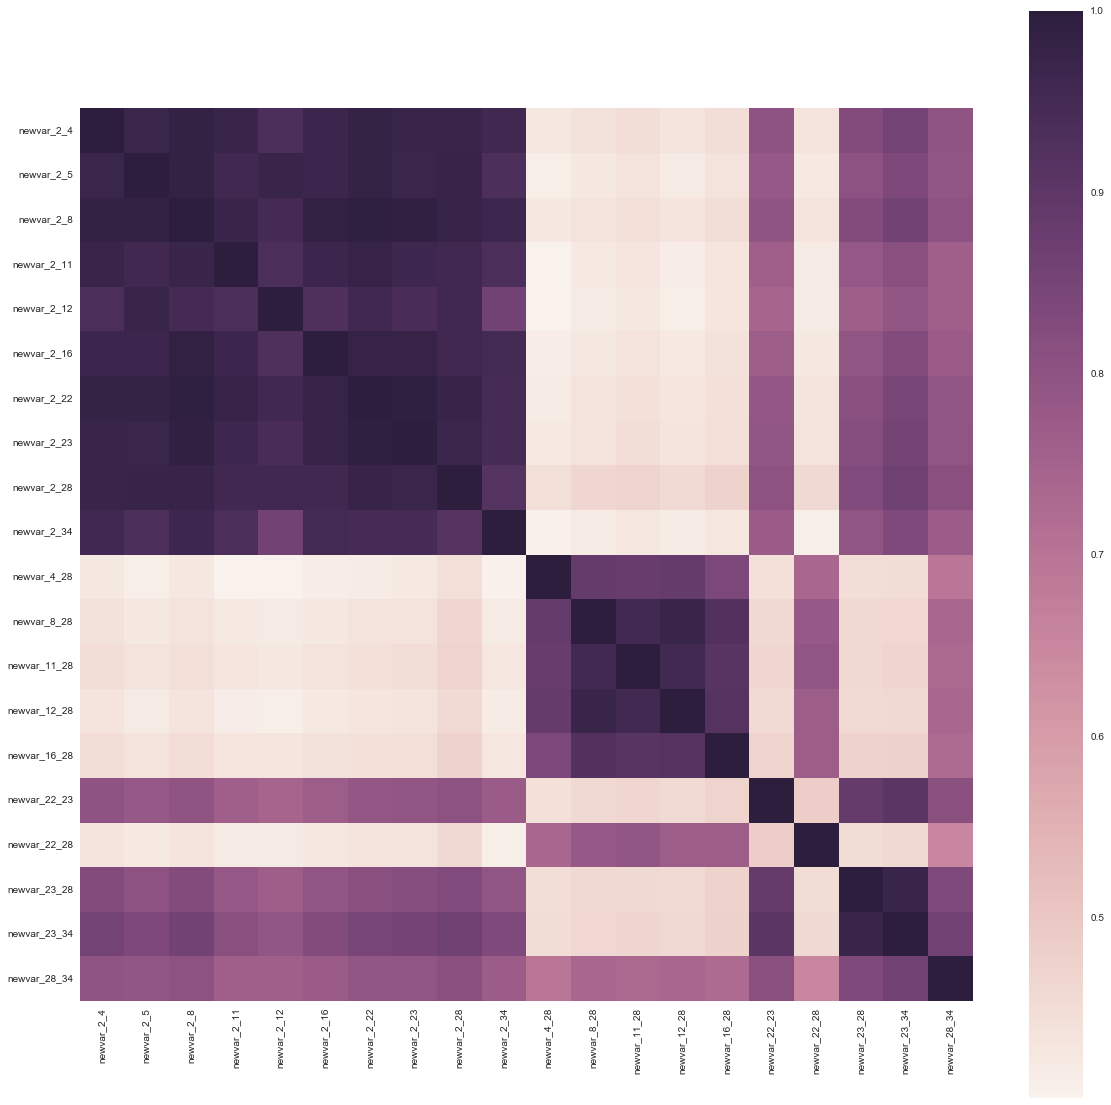

In [10]:
#check the correlations

corrmat =newvars_df[newvarnames].corr()
f, ax = plt.subplots(figsize=(20, 20)) 
display(sns.heatmap(corrmat, vmax=1, square=True))

print(newvars_df.shape)

In [11]:
newvars_df.isnull().sum().sum()

0

In [12]:
#combine the clusters of highly correlated variables
#hierarcial clustering
import copy

#update the clusters by combining clusters which are close enough
def Clusterize(clusters,threshold,corrmat):
    
    removelist=set()
    returnclusters=clusters[:]

    for i,cluster1 in enumerate(clusters):
        
        for j,cluster2 in enumerate(clusters[i+1:]):

            #distance is the minimum correlation between the clusters
            clusterdistance=corrmat.loc[cluster1,cluster2].min().min()
            
            #if the clusters are connected, combine them
            if clusterdistance > threshold:
                
                returnclusters[i].update(cluster2)
                
                if cluster2 not in removelist:
                    removelist.add(i+j+1)
                
                

    #if no clusters we connected, the clusterizing can be terminated
    if not removelist:
        return None
    
    else:

        removeclusters=[]
        for f in removelist:
            removeclusters.append(clusters[f])
        
        for cluster in removeclusters:
            returnclusters.remove(cluster)
        return returnclusters
    
#treshhold for clusters
threshold=0.85
#start from individual variables, list of sets
clusters=[set([x]) for x in newvarnames]

#loop until clusterize does something
while Clusterize(clusters,threshold,corrmat):
    clusters=Clusterize(clusters,threshold,corrmat)

print('number of clusters:', len(clusters))

number of clusters: 6


In [13]:
#replace the members of the clusters by their mean

def clustervariables(clusters,data_df):
    
    clust_df=pd.DataFrame(index=data_df.index)
    clustnames=[]
    
    numclusters=len(clusters)
    
    for i,cluster in enumerate(clusters):
    
        name='cluster_'+str(i)
        
        #take the cluster mean as the new value
        clust_df[name]=data_df[list(cluster)].mean(axis=1).values
        
        #take the names
        clustnames.append(name)
    
    return clust_df, clustnames

#clust_df=pd.DataFrame(index=data_df.index)
clust_df,clustnames=clustervariables(clusters,newvars_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117041128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117712eb8>]], dtype=object)

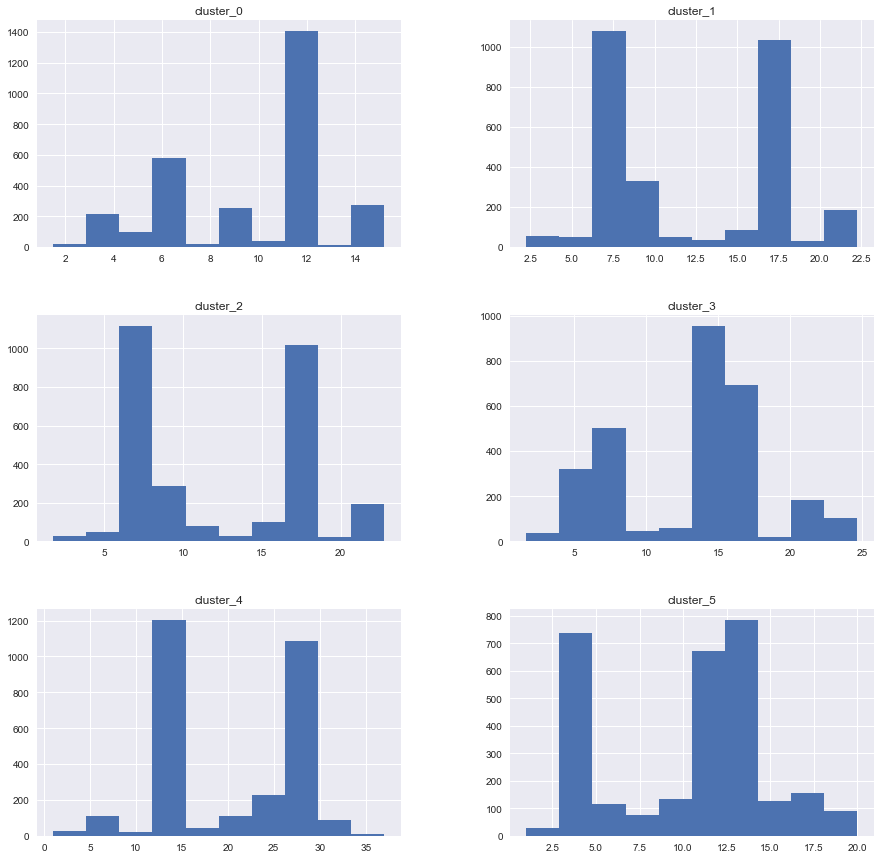

In [14]:
#clust_df
#some of the new variables should go through transformations but too lazy for that atm
clust_df.hist(figsize=(15,15))

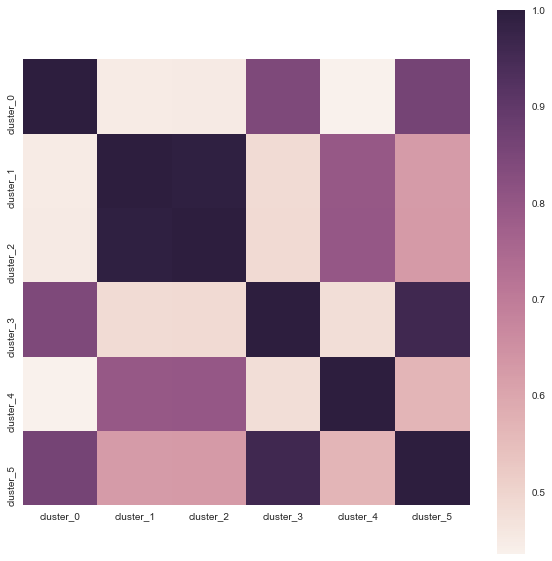

In [15]:
#check the correlations
corrmat_clust =clust_df.corr()
f, ax = plt.subplots(figsize=(10, 10)) 
display(sns.heatmap(corrmat_clust, vmax=1, square=True))

#ok, looks much better

In [16]:
#join the variables
#clust_df.isnull().sum()
combi_df=combi_df.join(clust_df)
#combi_df
#do a check
#variables=quantitative+qual_encoded+binary_encoded+clustnames
#CheckFeatures(combi_df.loc['train',variables],Y_train,variables)  
#some of the clusters seem important..


In [17]:
# Recursive Feature Elimination

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, Lasso, LassoLarsCV,LinearRegression
from sklearn.feature_selection import RFE

#get the features which has ranking better than rank
def RFE_output(data_df,target):

    #check with earlier reltively good parameters
    RF=RandomForestRegressor(n_estimators=100)
    lasso=Lasso(max_iter=10000,alpha=0.001)
    linreg = LinearRegression()

    #rfes
    rfe_lg = RFE(linreg)
    rfe_RF = RFE(RF)
    rfe_lasso = RFE(lasso)
    
    #Fit
    linreg.fit(data_df.values[:], target)
    rfe_lg.fit(data_df.values[:], target)   
    rfe_RF.fit(data_df.values[:], target) 
    rfe_lasso.fit(data_df.values[:], target) 
   
    #get the coefficients
    coeff_df = pd.DataFrame(data_df.columns)
    coeff_df.columns = ['Feature']
    coeff_df["Linreg_coeff"] = pd.Series(linreg.coef_)

    coeff_df["RFE_lg"]=pd.Series(rfe_lg.ranking_)
    coeff_df["RFE_RF"]=pd.Series(rfe_RF.ranking_)
    coeff_df["RFE_lasso"]=pd.Series(rfe_lasso.ranking_)

    
    #sort
    display(coeff_df.sort_values(by="Linreg_coeff",ascending=False))
    
    return coeff_df

#get the most importan features in RFE
variables=quantitative+qual_encoded+binary_encoded+clustnames
rferesults_df=RFE_output(combi_df.loc['train',variables],Y_train)

,Feature,Linreg_coeff,RFE_lg,RFE_RF,RFE_lasso
69,TotalBsmtSF_0,0.629488,1,39,31
62,PoolArea_0,0.623561,1,40,39
3,YearBuilt,0.534470,1,1,25
10,GrLivArea,0.408194,1,1,1
51,PoolQC_E,0.300575,1,38,27
68,2ndFlrSF_0,0.253908,1,35,30
7,TotalBsmtSF,0.078496,1,1,13
58,LowQualFinSF_0,0.074769,1,36,34
42,CentralAir_E,0.054855,1,1,1
1,OverallQual,0.046582,1,1,1


RF scores:  [ 0.12674953  0.15303628  0.14397672  0.12628837]  mean:  0.137512726168
Lasso scores:  [ 0.1366517   0.13854466  0.13065368  0.10895808]  mean:  0.128702031271
RF scores:  [ 0.13902221  0.13958576  0.14591132  0.13988788]  mean:  0.141101791003
Lasso scores:  [ 0.12653231  0.13167979  0.13914621  0.12171423]  mean:  0.129768137189


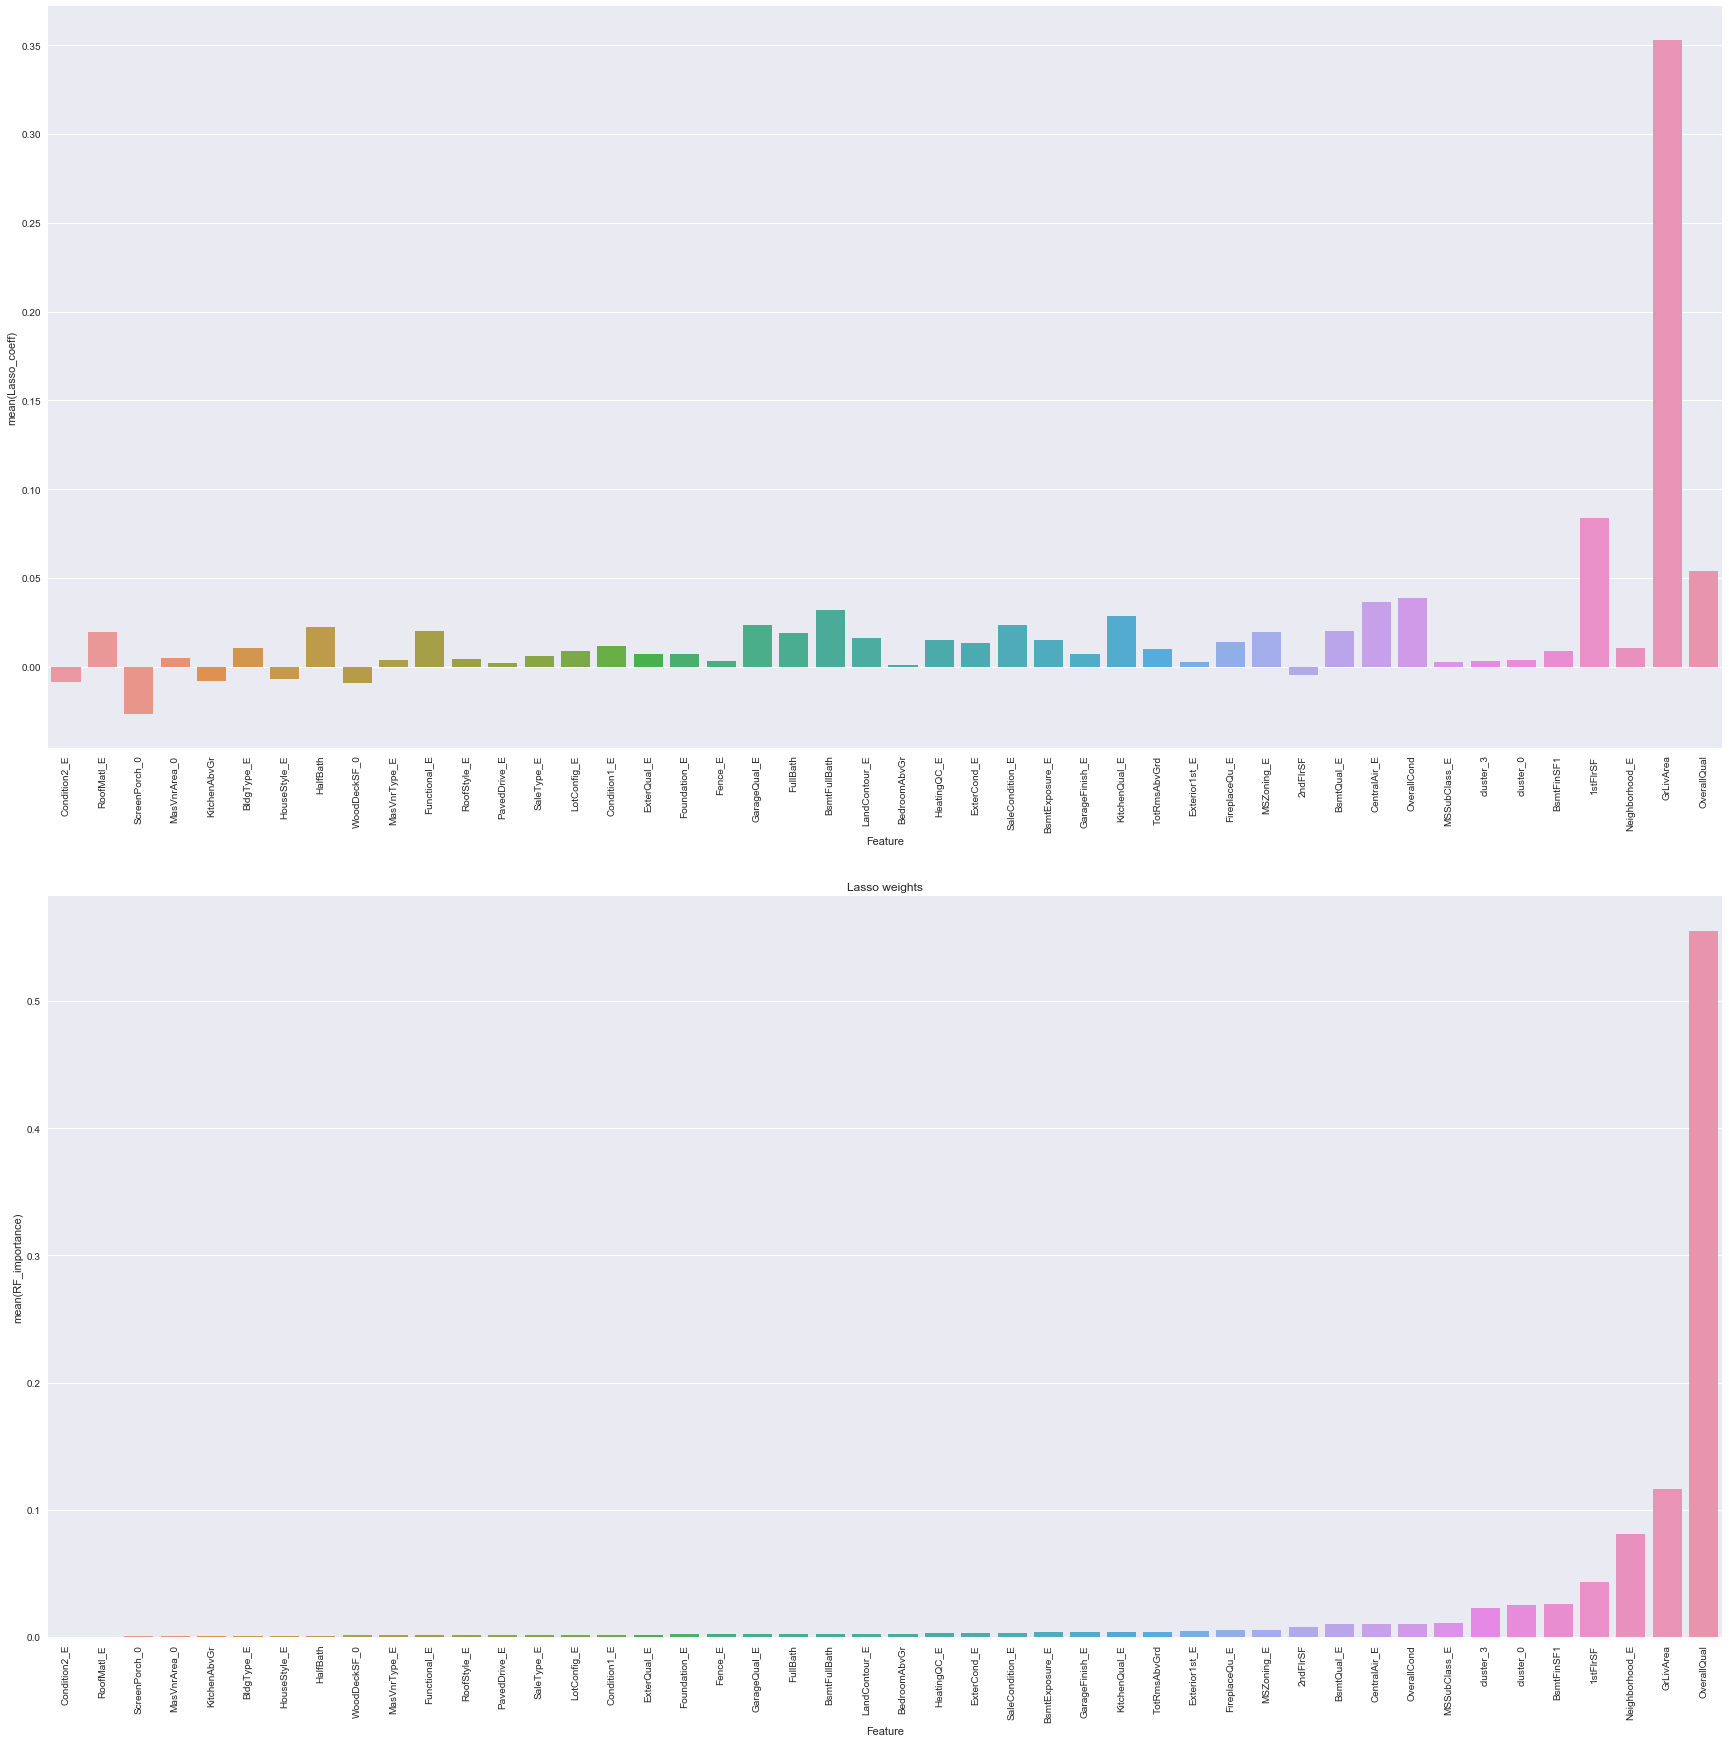

In [18]:
#try scores by taking only features with good enough rank
rfe_varlist=list(rferesults_df.loc[rferesults_df['RFE_lasso']<10]['Feature'])
CheckFeatures(combi_df.loc['train'],Y_train,rfe_varlist) 

#the scores have improved..

variance explained by the 50 largest components 0.946131548474


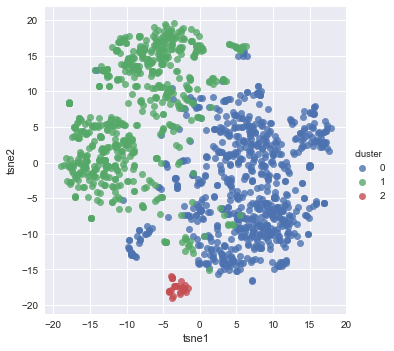

In [19]:
#check clustering from PCA and k-means check also t-SNE

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

variables = quantitative + qual_encoded + binary_encoded + clustnames

#t-SNE mapping to 2 dimensions, find clusters with k-means
#prepocess the dimension to 50 with PCA

#scale the mean 0 unit variance
std = StandardScaler()
s = std.fit_transform(combi_df.loc['train',variables])

#find biggest 50 PCA components
pca = PCA(n_components=50)
pca.fit(s)
pc = pca.transform(s)

#find clusters from these
kmeans = KMeans(n_clusters=3)
kmeans.fit(pc)


model= TSNE(n_components=2, random_state=0, perplexity=50)
tsne = model.fit_transform(pc)


#print out the clusters
fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print('variance explained by the 50 largest components',np.sum(pca.explained_variance_ratio_))

#seems like we could try segmential clustering with 3 clusters

RF scores:  [ 0.15088885  0.16783755  0.16237377  0.13917703]  mean:  0.15506929763
Lasso scores:  [ 0.14558232  0.14087733  0.13596199  0.11318826]  mean:  0.1339024727
RF scores:  [ 0.14540317  0.15560435  0.17372212  0.14453306]  mean:  0.154815675842
Lasso scores:  [ 0.12549725  0.13959279  0.15116033  0.11955821]  mean:  0.133952141956


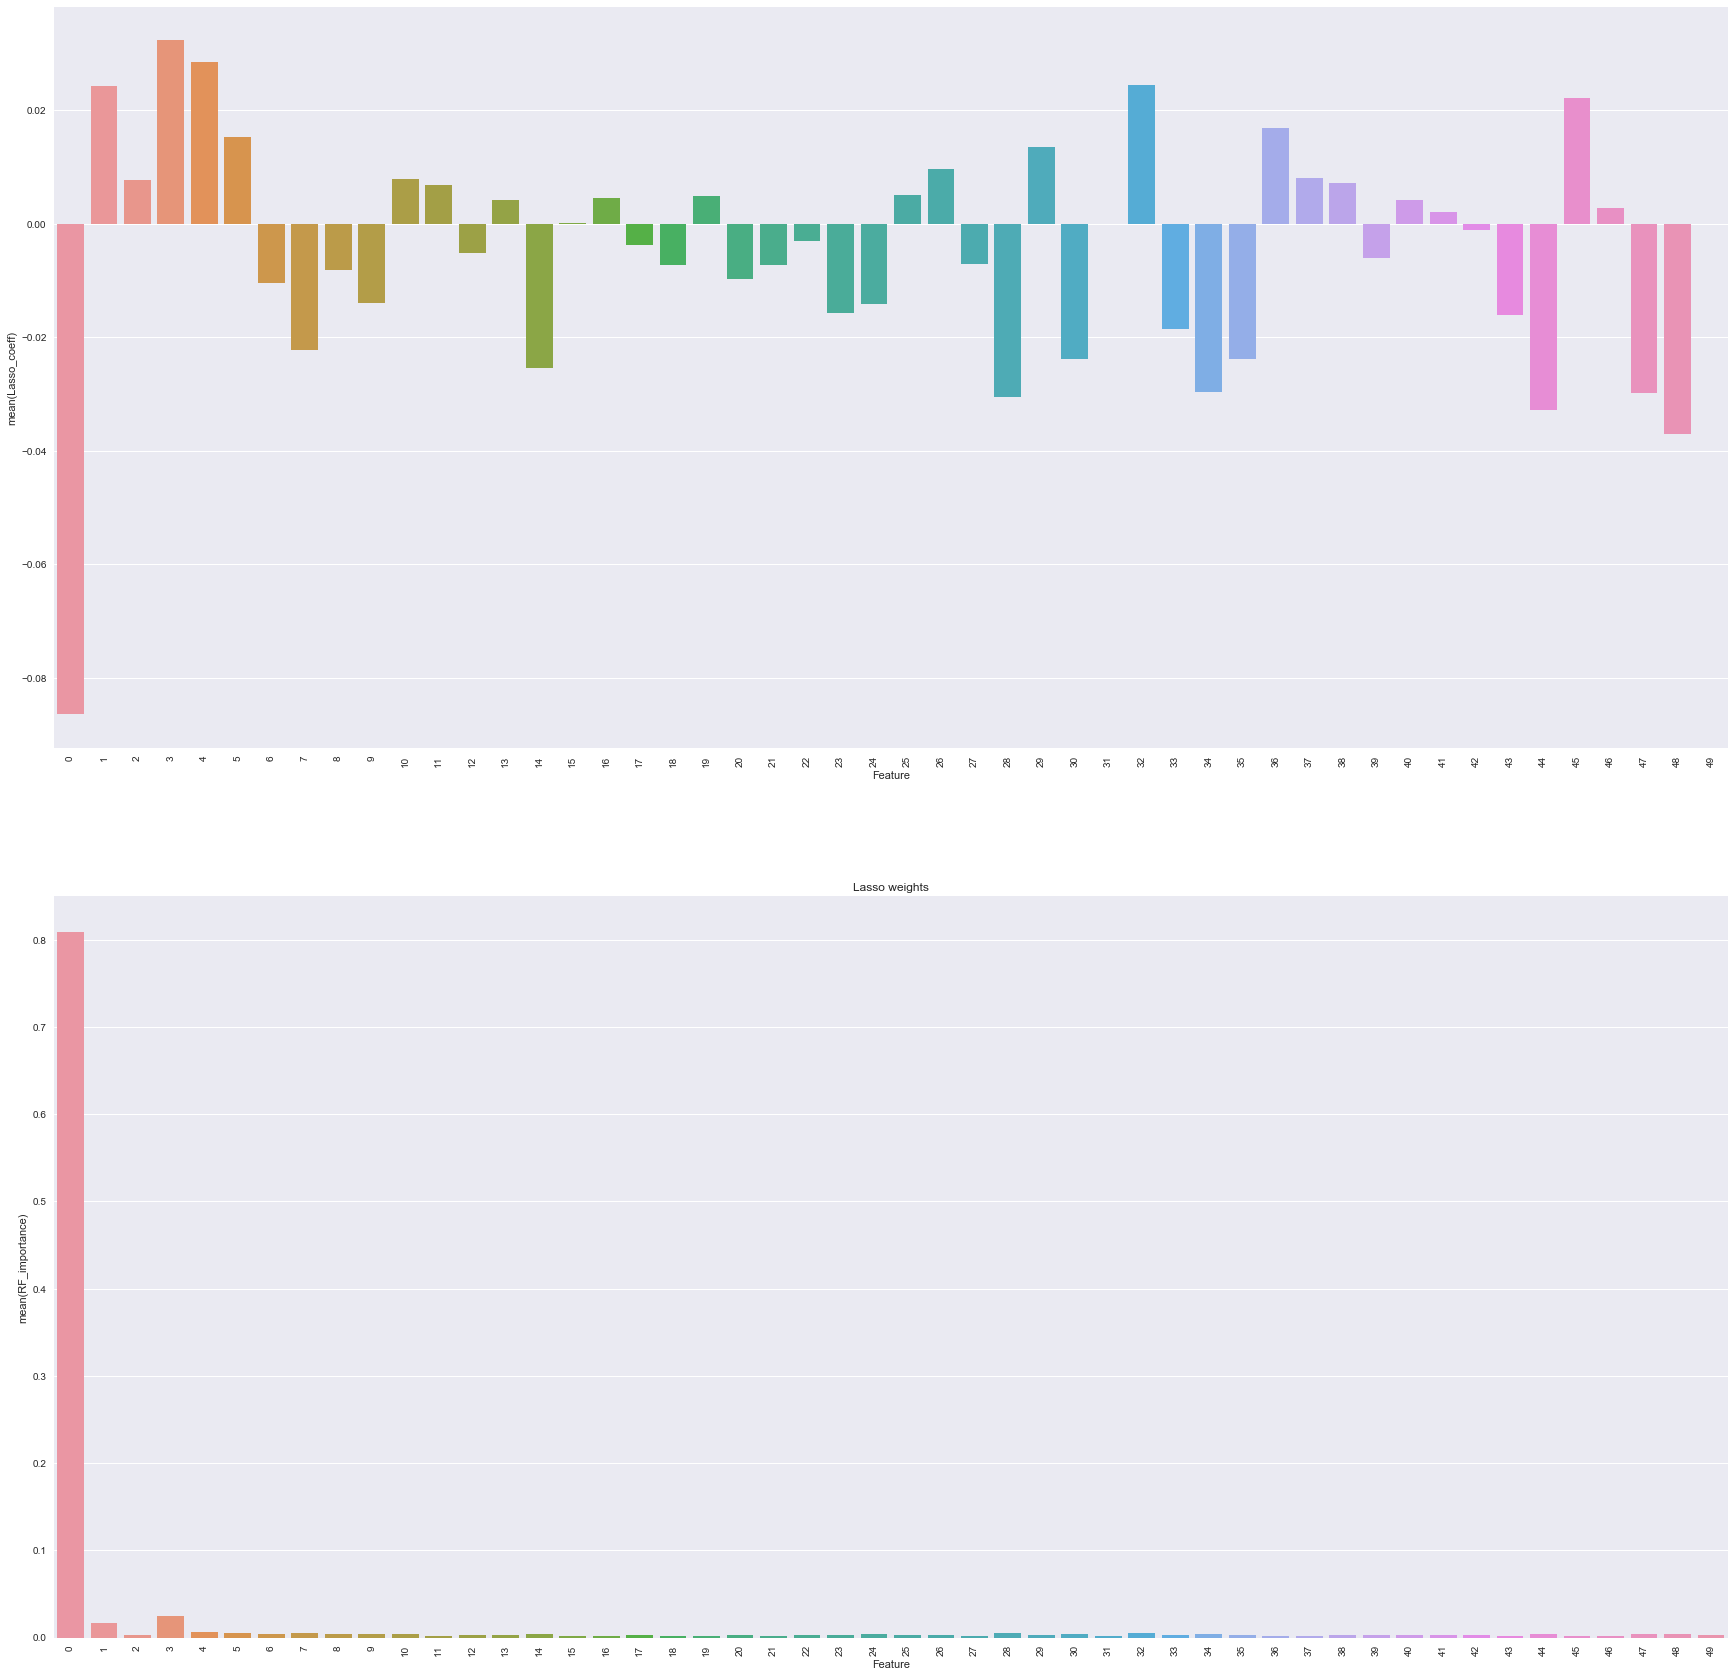

In [20]:
#test results with pca components
CheckFeatures(pd.DataFrame(pc),Y_train)
#quite bad as expected, almost all the significant components are projected to a new variable
#especially tree methods lose their power


In [21]:
#use binary encoded, qual_encoded and binned quantitatives to predict the bin for segmential regression

#save the variables to be used in sequential regression in another notebook

variables = quantitative + qual_encoded + binary_encoded + clustnames +binvars

combi_df[variables].to_csv('combi_df_FE.csv')

quantitativesr=quantitative

%store qual_encoded
%store binary_encoded
%store quantitativesr
%store clustnames
%store binvars
#ok, ready for models..

Stored 'qual_encoded' (list)
Stored 'binary_encoded' (list)
Stored 'quantitativesr' (list)
Stored 'clustnames' (list)
Stored 'binvars' (list)


In [22]:
combi_df.isnull().sum().sum()

0